In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Introduction
-

For my project, I will analyzing several economic indicator variables during expansions and recessions. The variables I will be looking at are Gross Domestic Product (GDP), Consumer Price Index (CPI), unemployment rate, labor force participation rate, discouraged worker rate, federal funds rate, and the discount rate. Explanations of each variable:
- GDP: Measures total market value of all goods and services produced within a specified time period.
- CPI: Tracks changes in prices of a basket of consumer goods commonly purchased by households (food, beverages, housing, transportation, healthcare, education, etc.). This is commonly used to measure inflation over a set time period.
- Unemployment Rate: Percentage of the labor force who are unemployed.
- Labor Force Participation Rate: Percentage of the population that is employed or seeking employment.
- Discouraged Worker Rate: Percentage of the labor force that dropped out of the labor force because they believe there are no jobs available or couldn't find one.
- Federal Funds Rate: Interest rate at which commercial banks borrow and lend money overnight. Set by the Federal Reserve.
- Discount Rate: Interest rate the Federal Reserve charges banks for short-term loans.

I got all the data for this project from the St. Louis Federal Reserve website (FRED), where they provide CSV files for these variables. The research questions I will be answering for this project are:
- How does GDP change in recessions vs expansions? 
- How does CPI change in recessions vs expansions? 
- How do the federal funds rate and discount rate change in recessions vs expansions?
- What effect do recessions and expansions have on the unemployment rate, labor force participation, and percentage of discouraged workers?

The recessions I will be looking at are:
- 2020 Covid Crisis (February 2020 - April 2020)
- 2008 Housing Crisis (December 2007 - June 2009)
- 1973 Oil Crisis (November 1973 - March 1975)

The expansions I will be looking at are:
- Vietnam War Expansion (February 1961 - December 1969)
- 1990s Expansion (March 1991 - March 2001)
- Start of the 1970s Expansion (November 1970 - November 1973)

I worked alone on this project and therefore did all the analysis and coding.


Downloading data from FRED
-

To start my project, I downloaded the appropriate CSV files from the St. Louis FED website (FRED) and read them into this notebook. FRED had every variable I wanted except for discouraged worker percentage, which I had to make myself using discouraged worker and labor force data. This was fairly simple using tools available on the website for creating variables of interest. For each variable, I changed the column names to ones that would be easier to work with and converted the date column to date time instead of strings. I did this so that I could easier access the time periods of interest. I also made date the index for ease of data wrangling. It's important to note that data for discouraged workers was not available before 1994, so the Oil Crisis, Vietnam War Expansion, and 1970s expansion won't include that variable on the comparison plots.

In [30]:
# GDP data in billions of chained 2017 dollars, quarterly 
gdp = pd.read_csv("GDPC1.csv")
gdp = gdp.rename(columns= {"observation_date" : "date", "GDPC1" : "GDP"})
gdp = gdp.set_index(["date"])
gdp.index = pd.to_datetime(gdp.index)

In [31]:
# Unemployment rate, monthly
unrate = pd.read_csv("UNRATE.csv")
unrate = unrate.rename(columns= {"observation_date" : "date"})
unrate = unrate.set_index(["date"])
unrate.index = pd.to_datetime(unrate.index)
unrate = pd.DataFrame(unrate)

# Labor force participation rate, monthly
labor_rate = pd.read_csv("CIVPART.csv")
labor_rate = labor_rate.rename(columns = {"observation_date" : "date" , "CIVPART" : "LFRATE "})
labor_rate = labor_rate.set_index(["date"])
labor_rate.index =  pd.to_datetime(labor_rate.index)
labor_rate = pd.DataFrame(labor_rate)

# Discouraged worker percentage of total civilian labor force, monthly
dis_rate = pd.read_csv("discouraged.csv")
dis_rate = dis_rate.rename(columns = {"observation_date" : "date", "LNU05026645_CLF16OV" : "DWRATE"})
dis_rate = dis_rate.set_index(["date"])
dis_rate.index = pd.to_datetime(dis_rate.index)
dis_rate = pd.DataFrame(dis_rate)


In [32]:
# CPI, monthly, base year: 1982-1984 = 100 
cpi = pd.read_csv("CPIAUCSL.csv")
cpi = cpi.rename(columns= {"observation_date" : "date" , "CPIAUCSL" : "CPI"})
cpi = cpi.set_index(['date'])
cpi.index = pd.to_datetime(cpi.index)

In [33]:
# federal funds rate, monthly
ffr = pd.read_csv("FEDFUNDS.csv")
ffr = ffr.rename(columns = {"observation_date" : "date", "FEDFUNDS" : "FFR"})
ffr = ffr.set_index(["date"])
ffr.index = pd.to_datetime(ffr.index)
ffr = pd.DataFrame(ffr)

# discount rate, monthly
dsc_rate = pd.read_csv("INTDSRUSM193N.csv")
dsc_rate = dsc_rate.rename(columns = {"observation_date" : "date", "INTDSRUSM193N" : "DSCRATE"})
dsc_rate = dsc_rate.set_index(["date"])
dsc_rate.index = pd.to_datetime(dsc_rate.index)
dsc_rate = pd.DataFrame(dsc_rate)

# merged 
bank_rates = ffr.merge(dsc_rate, on = "date")


Summary of each period
-

After I uploaded all of my data, I wanted to get an overall picture of each recession and expansion so that I could start my analysis. To do this, I created data frames with the appropriate data from each crisis or expansion. I used the .loc function to slice the time period of interest and matplotlib to create the summary plots. I did not use the strict start/end dates for each period, rather ones that gave a good picture of how the variable changed over the course of the recession or expansion. The summary plots themselves were made using matplotlib's subplot function where I made one plot with with six subplots with every variable. Since data for discouraged workers was not available prior to 1994, the plots of the periods before that have the federal funds and discount rates separate while the plots afterwards have them in the same one. 

In [34]:
# 2008 financial crisis

gdp_2008 = gdp.loc["2008" : "2010"]
bank_rates_2008 = bank_rates.loc["2007" : "2010"]
cpi_2008 = cpi.loc["2008" : "2010"]
lf_rate_2008 = labor_rate.loc["2008":"2010"]
dis_rate_2008 = dis_rate.loc["2008" : "2010"]
unrate_2008 = unrate.loc["2008" : "2010"]


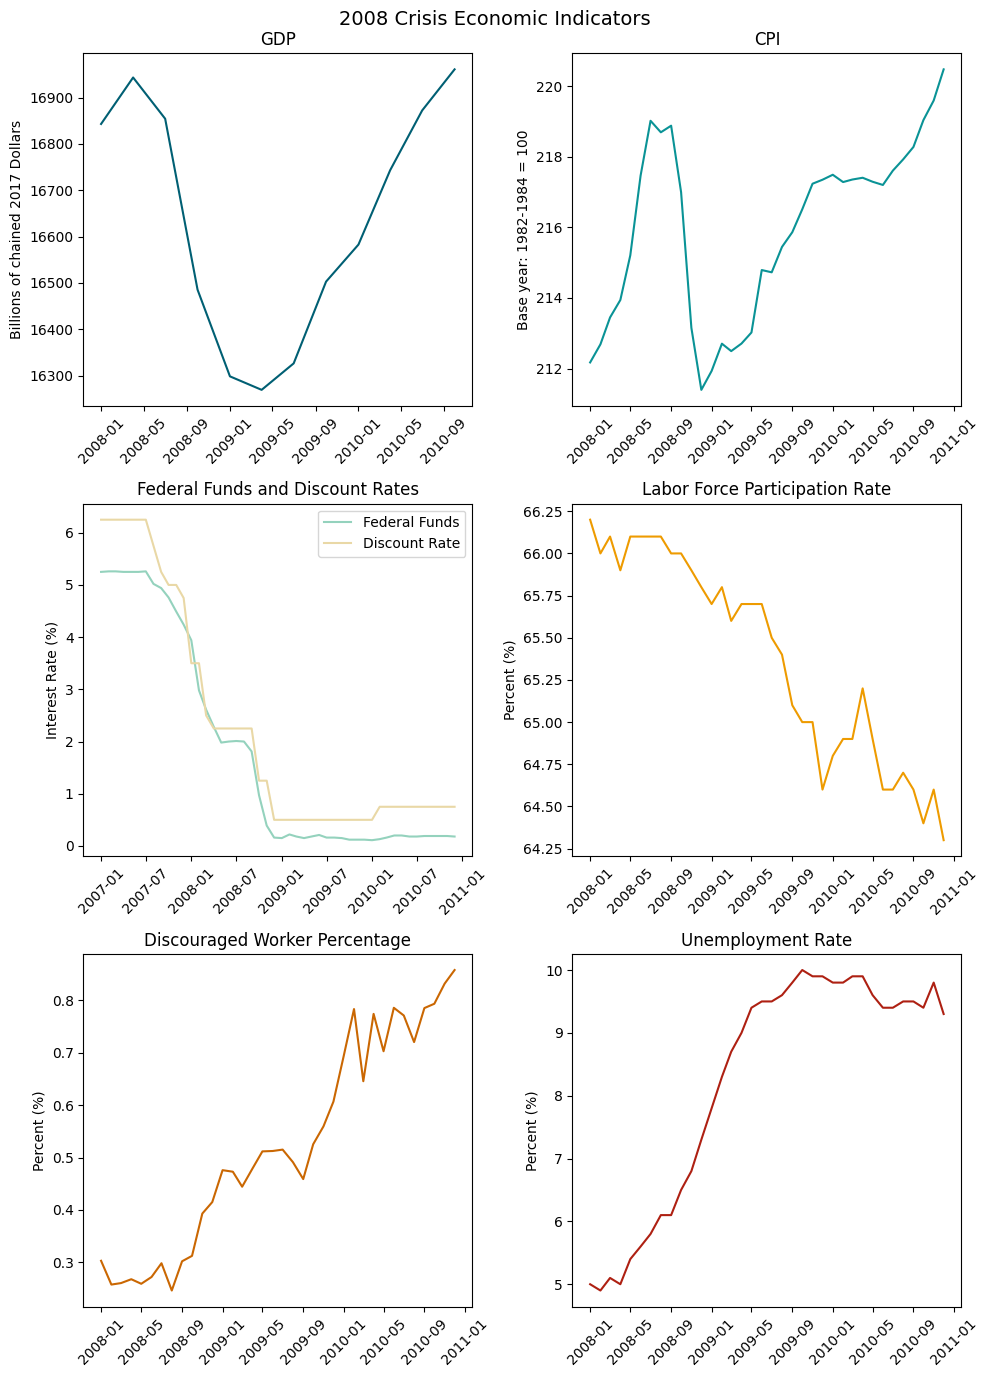

In [58]:
# 2008 plot

fig, ax = plt.subplots(3,2, figsize =  (10, 14))
fig.suptitle("2008 Crisis Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_2008, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_2008, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Bank rates
ax[1,0].plot(ffr.loc["2007" : "2010"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].plot(dsc_rate.loc["2007" : "2010"], label = "Discount Rate", color = "#E9D8A6")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds and Discount Rates")
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].legend()

#Labor Force
ax[1,1].plot(lf_rate_2008, label = "Labor Force", color = "#EE9B00")
ax[1,1].set_ylabel("Percent (%)")
ax[1,1].set_title("Labor Force Participation Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Discouraged Worker Rate
ax[2,0].plot(dis_rate_2008, label = "Discourged Workers", color = "#CA6702")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Discouraged Worker Percentage")
ax[2,0].tick_params(axis='x', labelrotation=45)

#Unemployment Rate
ax[2,1].plot(unrate_2008, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()


In [36]:
#Covid crisis

gdp_2020 = gdp.loc["2019" : "2021"]
bank_rates_2020 = bank_rates.loc["2019" : "2021"]
cpi_2020 = cpi.loc["2019" : "2021"]
lf_rate_2020 = labor_rate.loc["2019":"2021"]
dis_rate_2020 = dis_rate.loc["2019" : "2021"]
unrate_2020 = unrate.loc["2019" : "2021"]

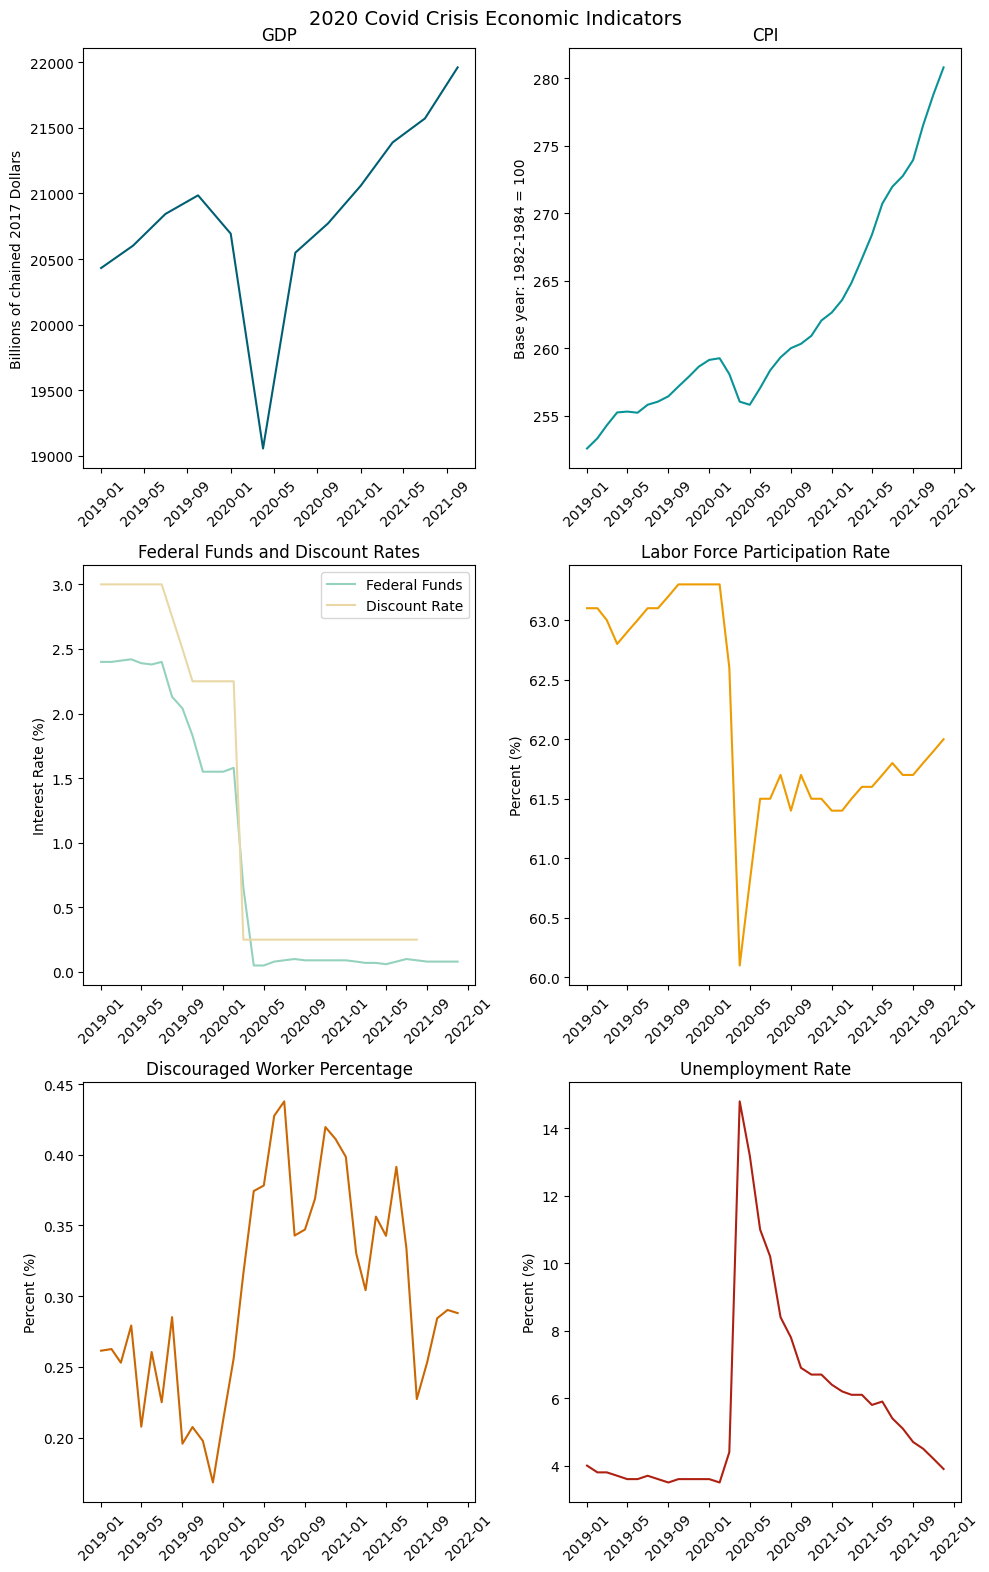

In [37]:
# Covid plot

fig, ax = plt.subplots(3,2, figsize =  (10, 16))
fig.suptitle("2020 Covid Crisis Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_2020, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_2020, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Bank rates
ax[1,0].plot(ffr.loc["2019" : "2021"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].plot(dsc_rate.loc["2019" : "2021"], label = "Discount Rate", color = "#E9D8A6")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds and Discount Rates")
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].legend()

#Labor Force
ax[1,1].plot(lf_rate_2020, label = "Labor Force", color = "#EE9B00")
ax[1,1].set_ylabel("Percent (%)")
ax[1,1].set_title("Labor Force Participation Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Discouraged Worker Rate
ax[2,0].plot(dis_rate_2020, label = "Discourged Workers", color = "#CA6702")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Discouraged Worker Percentage")
ax[2,0].tick_params(axis='x', labelrotation=45)

#Unemployment Rate
ax[2,1].plot(unrate_2020, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()


In [38]:
#1973 oil crisis
# no data for discouraged worker rate

gdp_1973 = gdp.loc["1972" : "1976"]
bank_rates_1973 = bank_rates.loc["1972" : "1976"]
cpi_1973 = cpi.loc["1973" : "1975"]
lf_rate_1973 = labor_rate.loc["1972":"1975"]
unrate_1973 = unrate.loc["1972": "1975"]


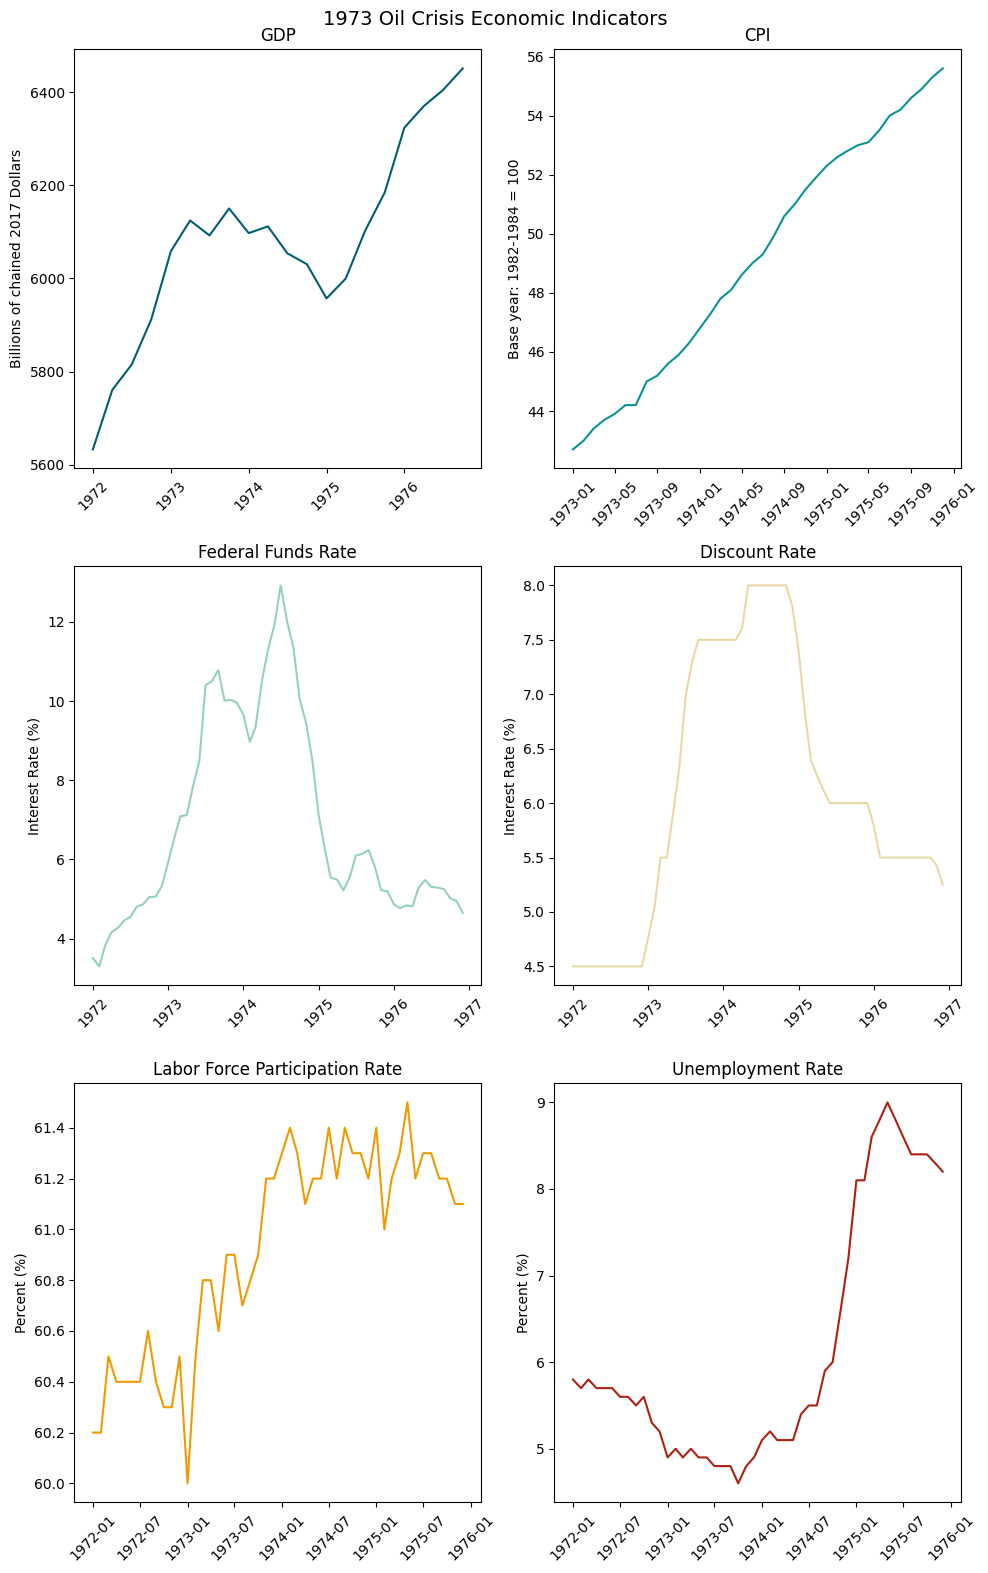

In [39]:
# 1973 plot

fig, ax = plt.subplots(3,2, figsize =  (10, 16))
fig.suptitle("1973 Oil Crisis Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_1973, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_1973, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Bank rates
ax[1,0].plot(ffr.loc["1972" : "1976"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds Rate")
ax[1,0].tick_params(axis='x', labelrotation=45)

#Discount rate
ax[1,1].plot(dsc_rate.loc["1972" : "1976"], label = "Discount", color = "#E9D8A6")
ax[1,1].set_ylabel("Interest Rate (%)")
ax[1,1].set_title("Discount Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Labor Force
ax[2,0].plot(lf_rate_1973, label = "Labor Force", color = "#EE9B00")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Labor Force Participation Rate")
ax[2,0].tick_params(axis='x', labelrotation=45)


#Unemployment Rate
ax[2,1].plot(unrate_1973, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()


In [40]:
# Vietnam War expansion
# no data for discouraged worker rate

gdp_1960 = gdp.loc["1960" : "1969"]
bank_rates_1960 = bank_rates.loc["1960" : "1969"]
cpi_1960 = cpi.loc["1960" : "1969"]
lf_rate_1960 = labor_rate.loc["1960" : "1969"]
unrate_1960 = unrate.loc["1960" : "1969"]


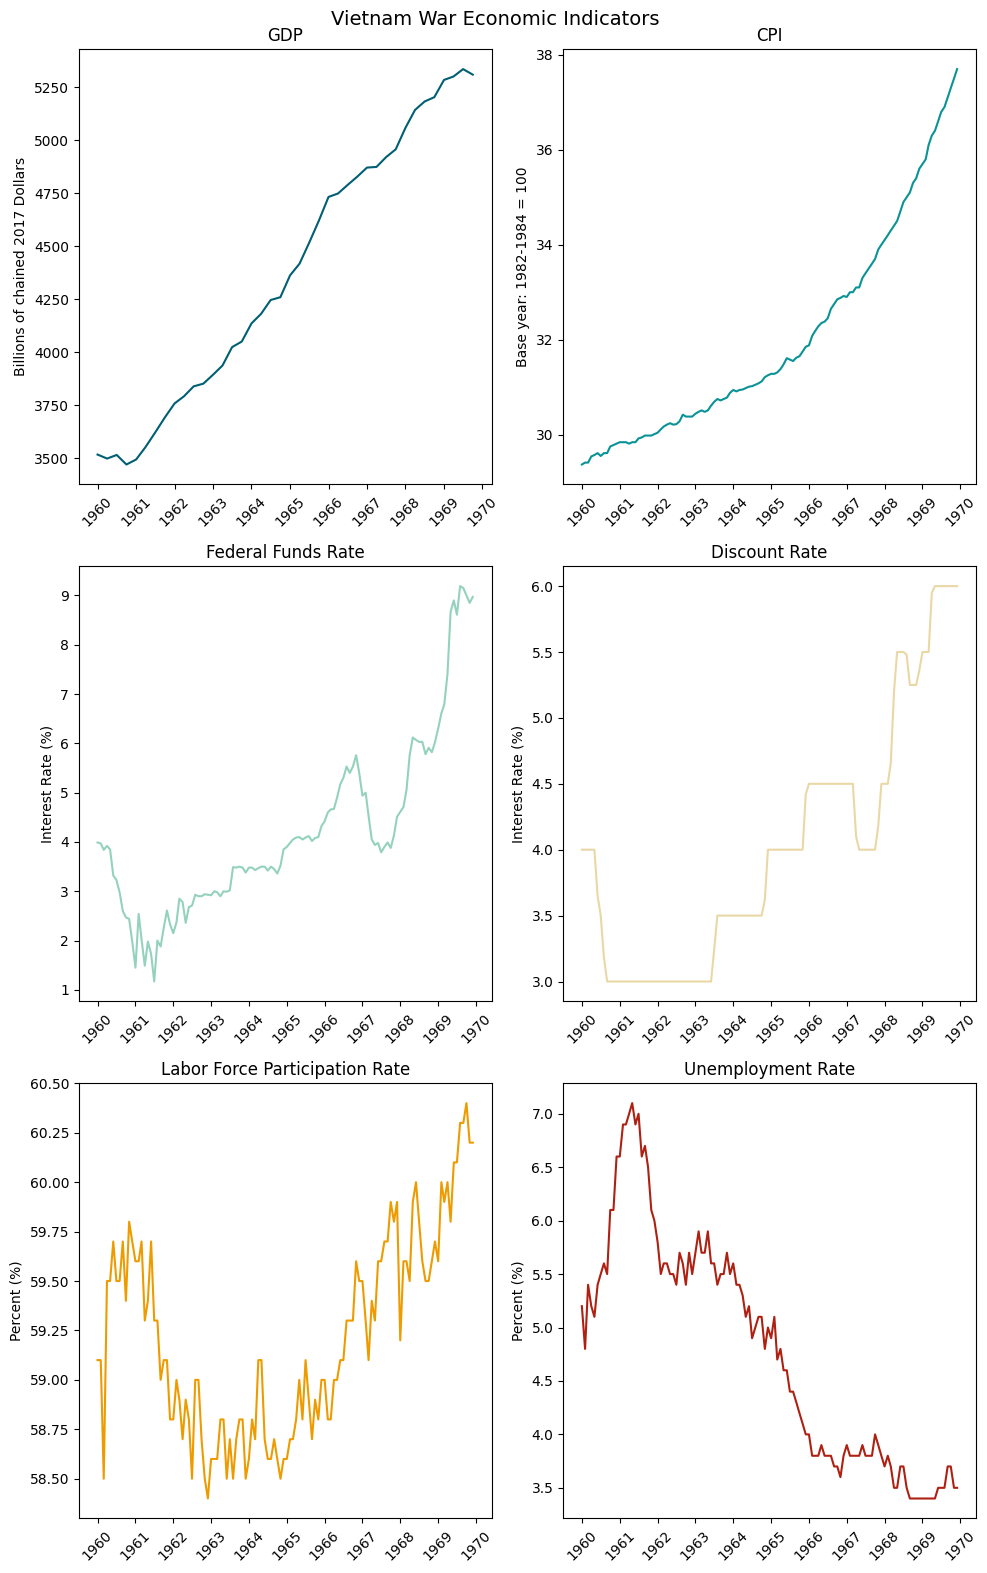

In [41]:
# Vietnam War plot

fig, ax = plt.subplots(3,2, figsize =  (10, 16))
fig.suptitle("Vietnam War Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_1960, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_1960, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Bank rates
ax[1,0].plot(ffr.loc["1960" : "1969"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds Rate")
ax[1,0].tick_params(axis='x', labelrotation=45)

#Discount rate
ax[1,1].plot(dsc_rate.loc["1960" : "1969"], label = "Discount", color = "#E9D8A6")
ax[1,1].set_ylabel("Interest Rate (%)")
ax[1,1].set_title("Discount Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Labor Force
ax[2,0].plot(lf_rate_1960, label = "Labor Force", color = "#EE9B00")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Labor Force Participation Rate")
ax[2,0].tick_params(axis='x', labelrotation=45)


#Unemployment Rate
ax[2,1].plot(unrate_1960, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()


In [42]:
# 90s expansion

gdp_1991 = gdp.loc["1991" : "2001-02-01"]
bank_rates_1991 = bank_rates.loc["1991" : "2001-02-01"]
cpi_1991 = cpi.loc["1991" : "2001-02-01"]
dis_rate_1991 = dis_rate.loc["1991" : "2001-02-01"]
lf_rate_1991 = labor_rate.loc["1991" : "2001-02-01"]
unrate_1991 = unrate.loc["1991" : "2001-02-01"]

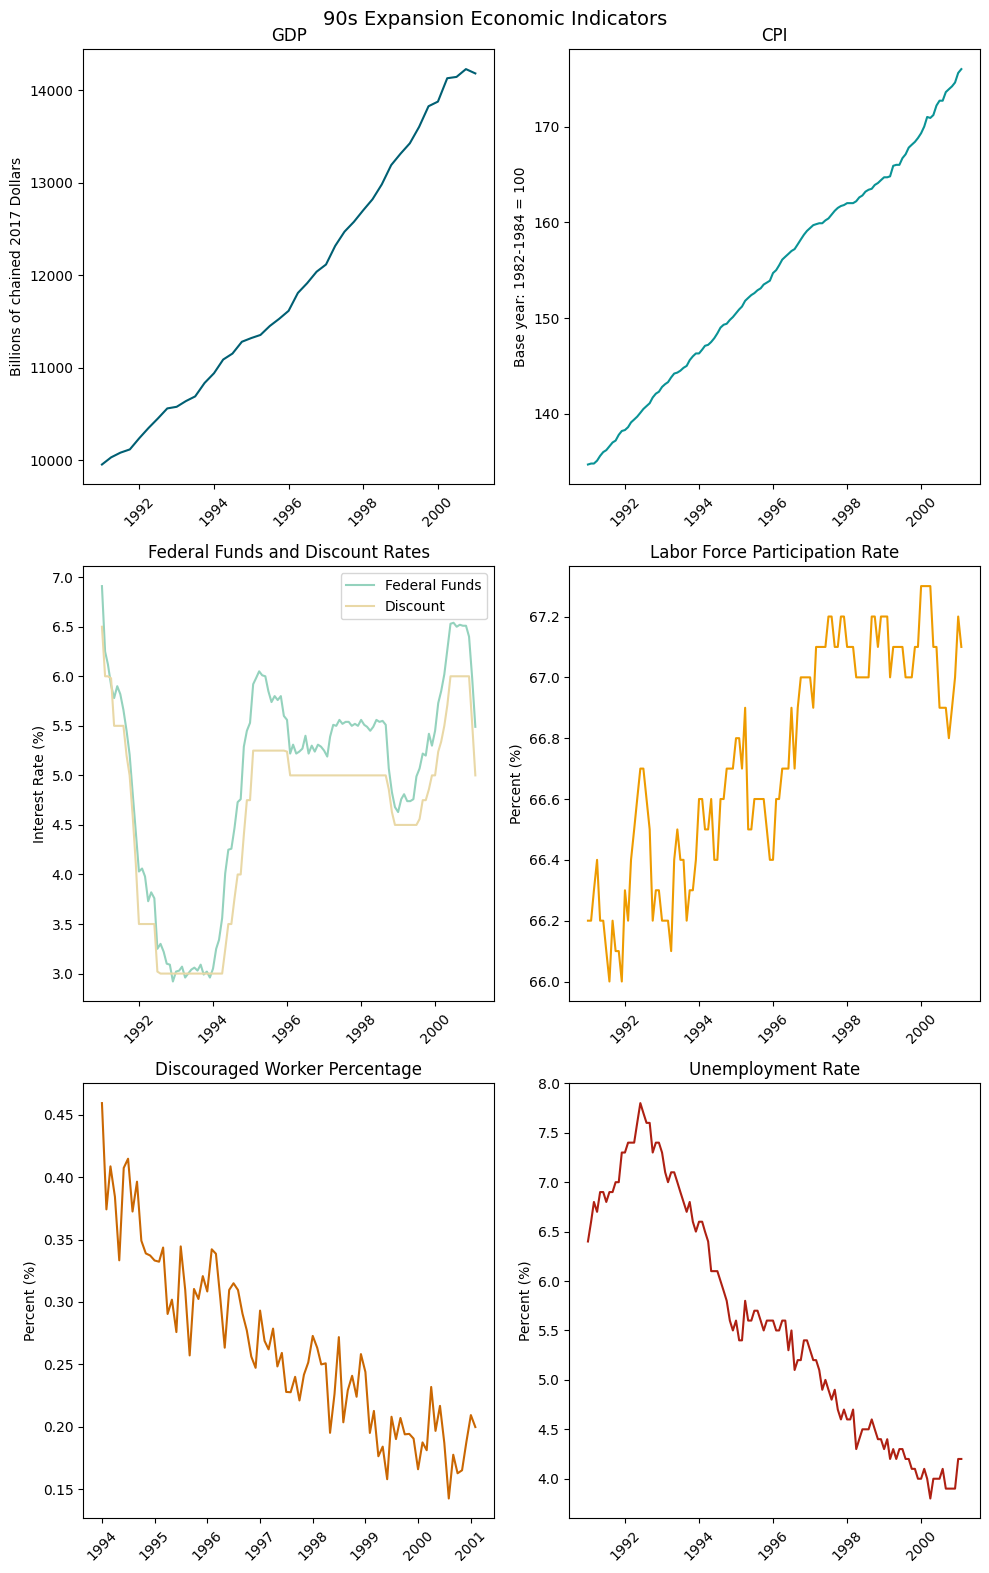

In [43]:
# 90s plot
# data for discouraged workers starting in 1994

fig, ax = plt.subplots(3,2, figsize =  (10, 16))
fig.suptitle("90s Expansion Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_1991, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_1991, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Bank rates
ax[1,0].plot(ffr.loc["1991" : "2001-02-01"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].plot(dsc_rate.loc["1991" : "2001-02-01"], label = "Discount", color = "#E9D8A6")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds and Discount Rates")
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].legend()

#Labor Force
ax[1,1].plot(lf_rate_1991, label = "Labor Force", color = "#EE9B00")
ax[1,1].set_ylabel("Percent (%)")
ax[1,1].set_title("Labor Force Participation Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Discouraged Worker Rate
ax[2,0].plot(dis_rate_1991, label = "Discourged Workers", color = "#CA6702")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Discouraged Worker Percentage")
ax[2,0].tick_params(axis='x', labelrotation=45)

#Unemployment Rate
ax[2,1].plot(unrate_1991, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()



In [44]:
# Start of 80s
# no data for discouraged workers

gdp_1980 = gdp.loc["1980" : "1981-9-01"]
bank_rates_1980 = bank_rates.loc["1980" : "1981-9-01"]
cpi_1980 = cpi.loc["1980" : "1981-9-01"]
lf_rate_1980 = labor_rate.loc["1980" : "1981-9-01"]
unrate_1980 = unrate.loc["1980-05-01" : "1981-9-01"]


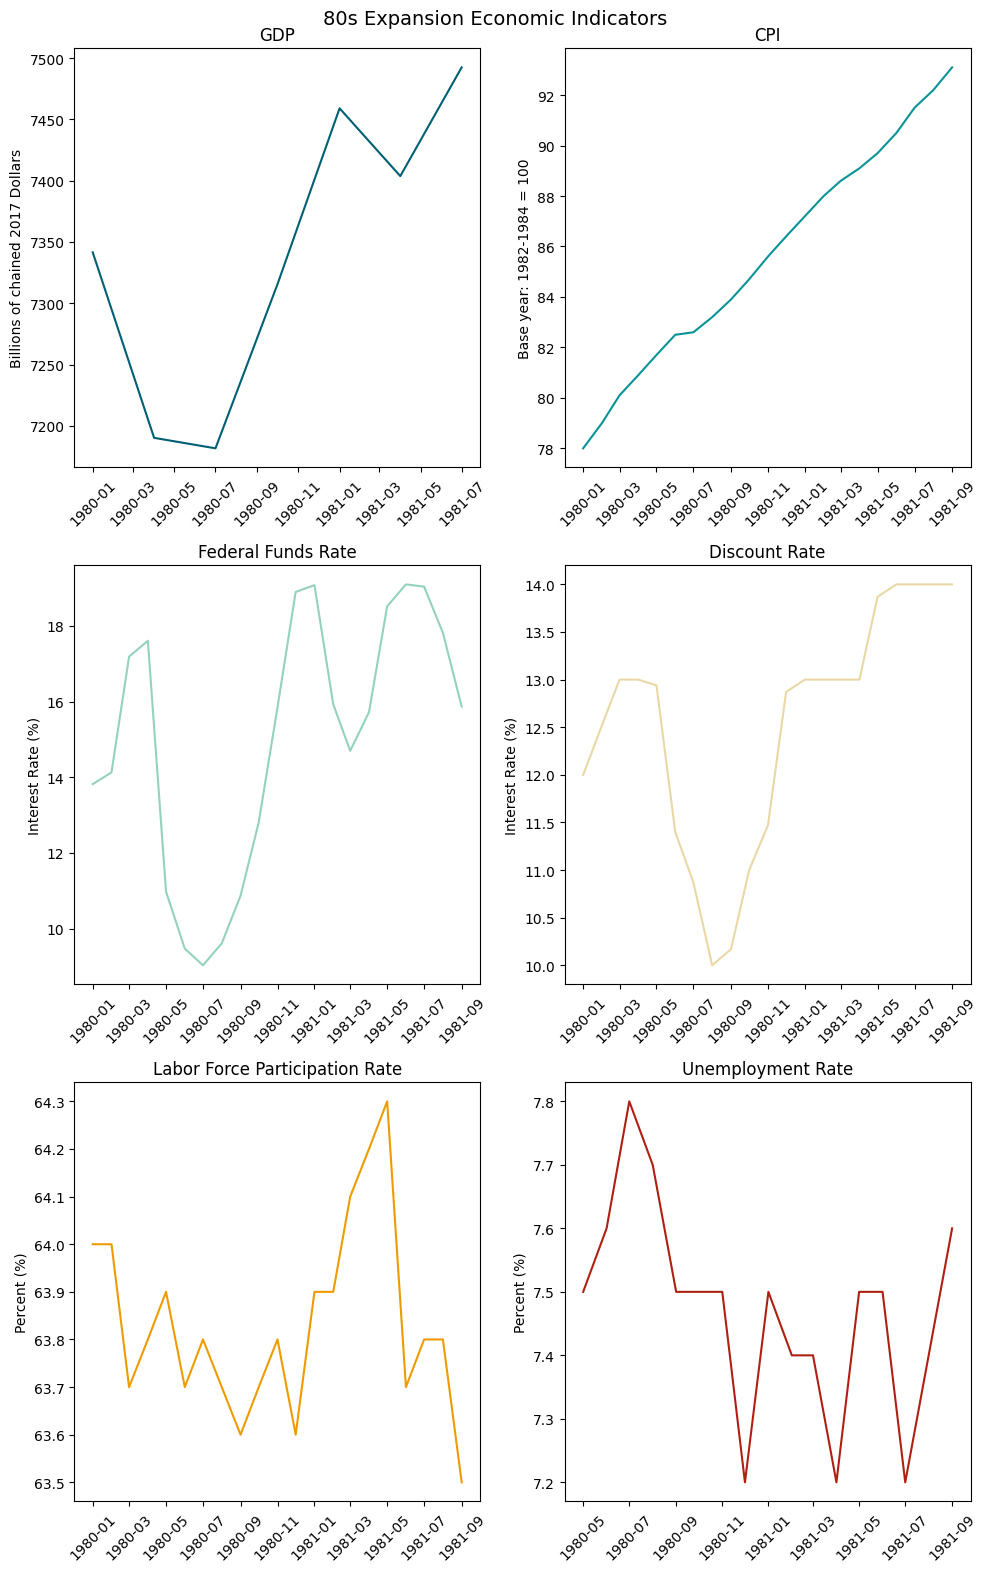

In [45]:
# 80s expansion plot 

fig, ax = plt.subplots(3,2, figsize =  (10, 16))
fig.suptitle("80s Expansion Economic Indicators", fontsize = 14)

#GDP
ax[0,0].plot(gdp_1980, label = "GDP", color = "#005F73")
ax[0,0].set_ylabel("Billions of chained 2017 Dollars")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_title("GDP")

#CPI
ax[0,1].plot(cpi_1980, label = "CPI", color = "#0A9396")
ax[0,1].set_ylabel("Base year: 1982-1984 = 100")
ax[0,1].set_title("CPI")
ax[0,1].tick_params(axis='x', labelrotation=45)

#Federal Funds
ax[1,0].plot(ffr.loc["1980" : "1981-09-01"], label = "Federal Funds", color = "#94D2BD")
ax[1,0].set_ylabel("Interest Rate (%)")
ax[1,0].set_title("Federal Funds Rate")
ax[1,0].tick_params(axis='x', labelrotation=45)

#Discount rate
ax[1,1].plot(dsc_rate.loc["1980" : "1981-09-01"], label = "Discount", color = "#E9D8A6")
ax[1,1].set_ylabel("Interest Rate (%)")
ax[1,1].set_title("Discount Rate")
ax[1,1].tick_params(axis='x', labelrotation=45)

#Labor Force
ax[2,0].plot(lf_rate_1980, label = "Labor Force", color = "#EE9B00")
ax[2,0].set_ylabel("Percent (%)")
ax[2,0].set_title("Labor Force Participation Rate")
ax[2,0].tick_params(axis='x', labelrotation=45)


#Unemployment Rate
ax[2,1].plot(unrate_1980, label = "Unemployment", color = "#AE2012")
ax[2,1].set_ylabel("Percent (%)")
ax[2,1].set_title("Unemployment Rate")
ax[2,1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()


Summary Plots Conclusion
-

Making each summary plot was very helpful to get an overall picture of how each variable changed in recessions and expansions.
 Some early conclusions for variables in recessions are:
- GDP decreases
- CPI tends to decrease 
- The federal funds rate and discount rate are decreased close to zero
- Labor force participation decreases
- The unemployment rate increases
- Discouraged worker rate increases

Some early conclusions for variables in expansions are:
- GDP increases
- CPI increases 
- The federal funds rate and discount rate increase 
- Labor force participation rate increases
- Unemployment rate decreased 
- Discouraged worker percentage decreases

I will explore these further when answering my research questions.


Research Question One: How does GDP change in recessions vs expansions?
-

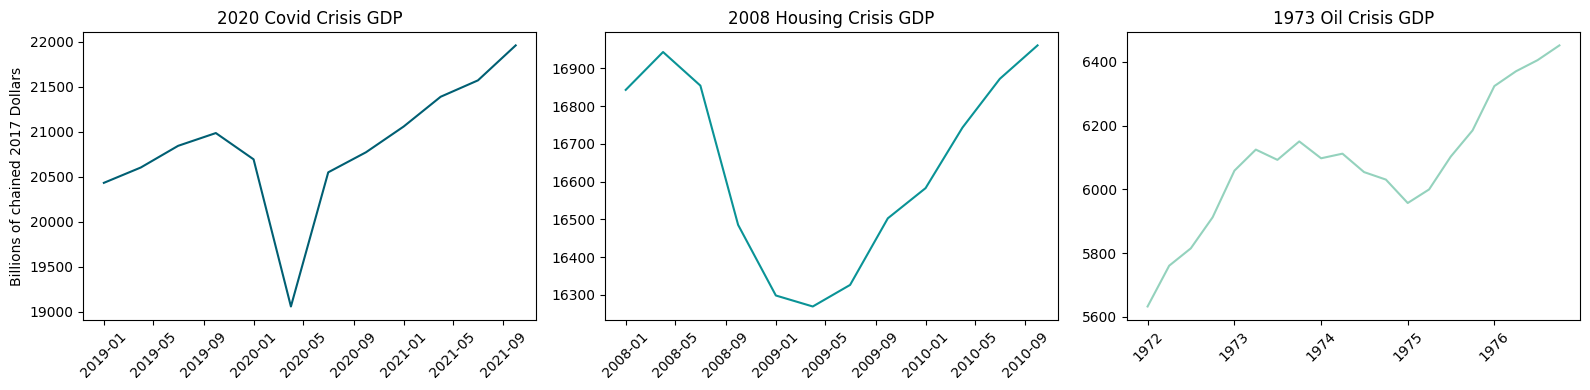

In [46]:
# GDP comparison recessions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Covid GDP
ax[0].plot(gdp_2020, color = "#005F73")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Billions of chained 2017 Dollars")
ax[0].set_title("2020 Covid Crisis GDP")

# 2008 GDP
ax[1].plot(gdp_2008, color = "#0A9396")
ax[1].set_title("2008 Housing Crisis GDP")
ax[1].tick_params(axis='x', labelrotation=45)

# Oil Crisis
ax[2].plot(gdp_1973, color = "#94D2BD")
ax[2].set_title("1973 Oil Crisis GDP")
ax[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

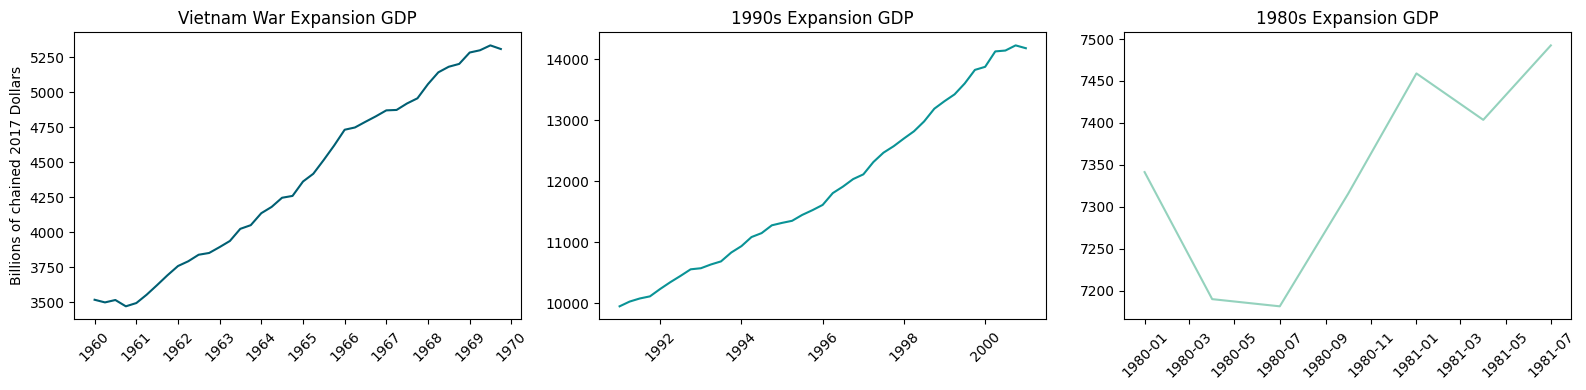

In [47]:
# GDP comparison expansions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Vietnam GDP
ax[0].plot(gdp_1960, color = "#005F73")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Billions of chained 2017 Dollars")
ax[0].set_title("Vietnam War Expansion GDP")

# 1990s GDP
ax[1].plot(gdp_1991, color = "#0A9396")
ax[1].set_title("1990s Expansion GDP")
ax[1].tick_params(axis='x', labelrotation=45)

# 1980s GDP
ax[2].plot(gdp_1980, color = "#94D2BD")
ax[2].set_title("1980s Expansion GDP")
ax[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

Research Question One Conclusion:
-

From these plots, I can see that in recessions, GDP decreases and in expansions, GDP increases. In expansions and recessions that went on for longer than a few years, the growth/decline is much more smoothed compared to the sharp spikes seen in during the Covid Crisis, Housing Crisis, and 1980s Expansion. These spikes are likely due to an initial shock factor like the worldwide fear of a pandemic in Covid or bankruptcy of the Lehman Brothers in 2008. In expansions and recessions that were longer, there might have been an initial market shock, but the growth or decline is steady over the period of interest. These conclusions make sense when one thinks about the nature of recessions and expansions. In recessions, the economy as a whole slows down, causing less production and growth. This directly caused GDP to dip for the length of the recessions. In expansions, the economy is getting larger, meaning there is more production, jobs, and growth as a whole. This would cause the increases in GDP which can be seen above.

Research Question Two: How does CPI change in recessions vs expansions? 
-

Note: CPI is calculated using a base year, which in this case is 1982-1984 and is set to 100. Numbers above 100 are read as, "(number - 100) percent increase from 1982-1984". For example, at the start of the Housing Crisis, CPI was around 219. This means that the CPI was 119% higher than it was in 1982-1984. Decreases in CPI can be read as percentage changes as well. For example, CPI at the start of the Housing Crisis went from 219 to 211. This means that CPI decreased 8% at the start of the crisis.

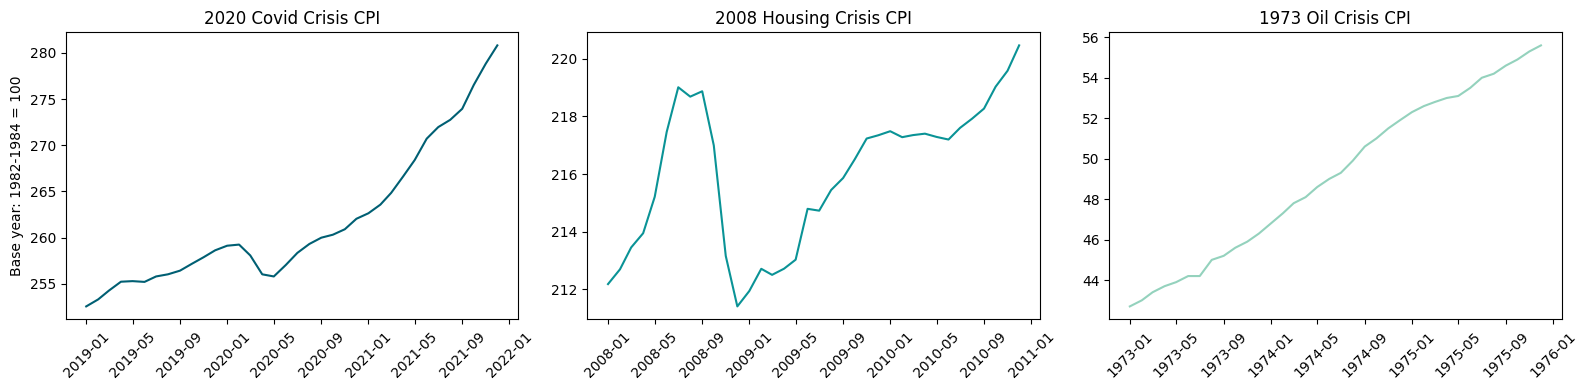

In [48]:
# CPI comparison recessions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Covid CPI
ax[0].plot(cpi_2020, color = "#005F73")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Base year: 1982-1984 = 100")
ax[0].set_title("2020 Covid Crisis CPI")

# 2008 CPI
ax[1].plot(cpi_2008, color = "#0A9396")
ax[1].set_title("2008 Housing Crisis CPI")
ax[1].tick_params(axis='x', labelrotation=45)

# Oil CPI
ax[2].plot(cpi_1973, color = "#94D2BD")
ax[2].set_title("1973 Oil Crisis CPI")
ax[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

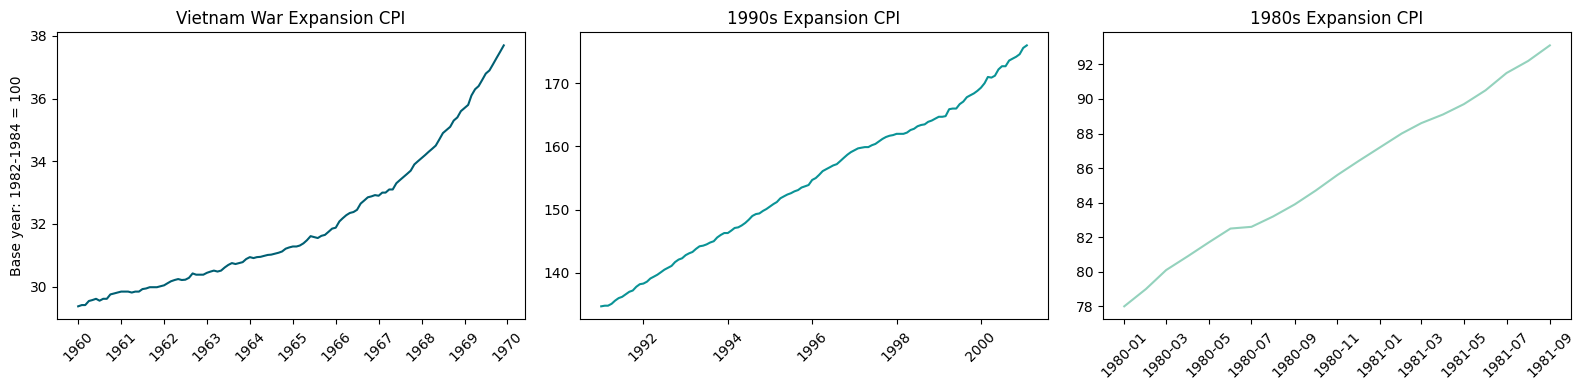

In [49]:
# CPI comparison expansions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Vietnam CPI
ax[0].plot(cpi_1960, color = "#005F73")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Base year: 1982-1984 = 100")
ax[0].set_title("Vietnam War Expansion CPI")

# 1990s CPI
ax[1].plot(cpi_1991, color = "#0A9396")
ax[1].set_title("1990s Expansion CPI")
ax[1].tick_params(axis='x', labelrotation=45)

# 1980s CPI
ax[2].plot(cpi_1980, color = "#94D2BD")
ax[2].set_title("1980s Expansion CPI")
ax[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

Research Question Two Conclusion:
-

In recessions, CPI tends to decrease. During the Covid Crisis and Housing Crisis, this effect can be seen by a sharp decrease in CPI. In the Oil Crisis it appears that CPI took a slight initial hit but was steadily growing afterwords. This analysis makes sense because in recessions there is less demand by consumers and prices tend to fall. In expansions, CPI tends to grow at a steady rate. There was a much sharper increase towards the end of the Vietnam War and a slight sharp increase at the start of the 1980s Expansion but growth of the three expansions appears to be linear. This conclusion can be supported by the idea that in expansions, consumer demand and spending increases substantially.

Research Question Three: How do the federal funds rate and discount rate change in recessions vs expansions?
-

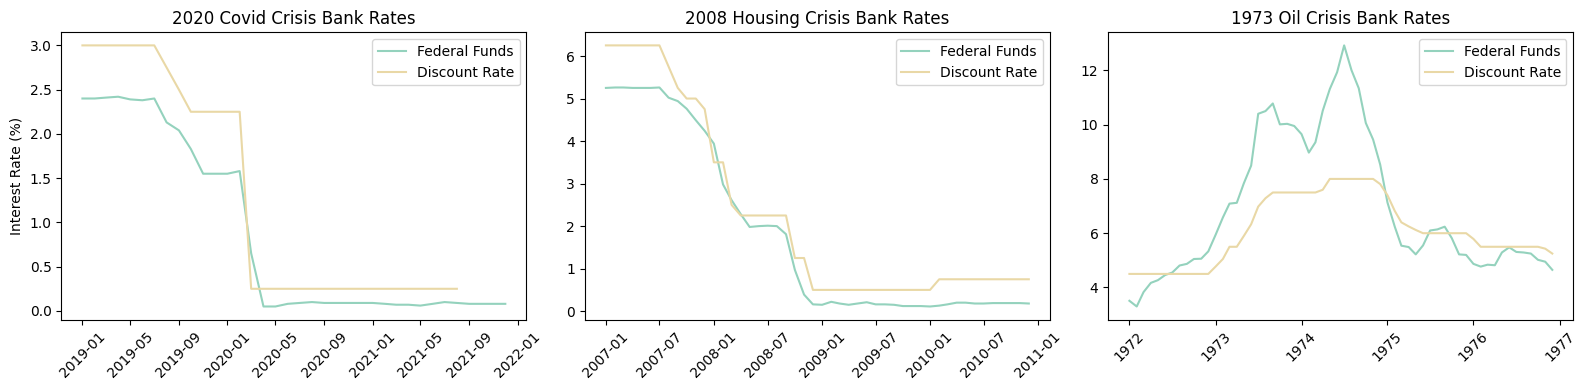

In [50]:
# Bank rates comparison recessions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Covid Rates
ax[0].plot(ffr.loc["2019" : "2021"], label = "Federal Funds" ,color = "#94D2BD")
ax[0].plot(dsc_rate.loc["2019" : "2021"], label = "Discount Rate" , color = "#E9D8A6")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Interest Rate (%)")
ax[0].set_title("2020 Covid Crisis Bank Rates")
ax[0].legend()

# 2008 GDP
ax[1].plot(ffr.loc["2007" : "2010"], label = "Federal Funds", color = "#94D2BD")
ax[1].plot(dsc_rate.loc["2007" : "2010"], label = "Discount Rate", color = "#E9D8A6")
ax[1].set_title("2008 Housing Crisis Bank Rates")
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].legend()

# Oil Crisis
ax[2].plot(ffr.loc["1972" : "1976"], label = "Federal Funds", color = "#94D2BD")
ax[2].plot(dsc_rate.loc["1972" : "1976"], label = "Discount Rate", color = "#E9D8A6")
ax[2].set_title("1973 Oil Crisis Bank Rates")
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].legend()

plt.tight_layout()

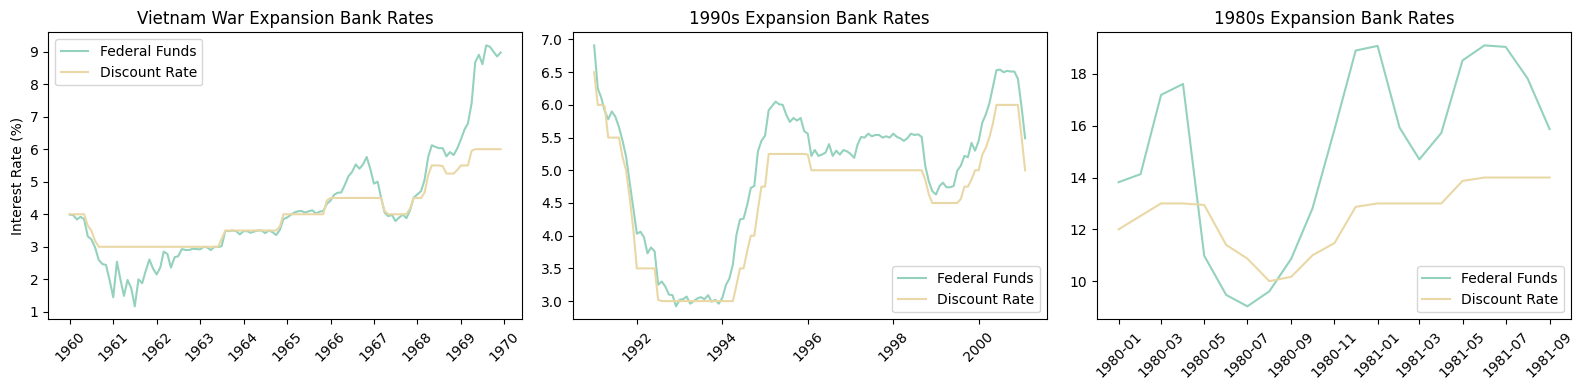

In [51]:
# Bank rates comparison expansions

fig, ax = plt.subplots(1,3, figsize = (16,4))

# Vietnam
ax[0].plot(ffr.loc["1960" : "1969"], label = "Federal Funds" ,color = "#94D2BD")
ax[0].plot(dsc_rate.loc["1960" : "1969"], label = "Discount Rate" , color = "#E9D8A6")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Interest Rate (%)")
ax[0].set_title("Vietnam War Expansion Bank Rates")
ax[0].legend()

# 1990s 
ax[1].plot(ffr.loc["1991" : "2001-02-01"], label = "Federal Funds", color = "#94D2BD")
ax[1].plot(dsc_rate.loc["1991" : "2001-02-01"], label = "Discount Rate", color = "#E9D8A6")
ax[1].set_title("1990s Expansion Bank Rates")
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].legend()

# 1980s
ax[2].plot(ffr.loc["1980" : "1981-09-01"], label = "Federal Funds", color = "#94D2BD")
ax[2].plot(dsc_rate.loc["1980" : "1981-09-01"], label = "Discount Rate", color = "#E9D8A6")
ax[2].set_title("1980s Expansion Bank Rates")
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].legend()

plt.tight_layout()

Research Question Three Conclusion:
-

In recessions, the federal funds rate and the discount rate are decreased pretty dramatically. In 2020 and 2008, the rates both went down close to zero, while in 1973, the federal funds rate decreased by about six percentage points to six percent and the discount rate went from about eight percent to under six percent. These decreases make sense because in recessions, the FED will try to stimulate the economy and promote spending by slashing interest rates. In expansions, the federal funds rate and the discount rate are increased. The amount of increase is not consistent across the three expansions, with the federal funds rate increasing by up to eight percent during the Vietnam War, three and a half percent during the 90s, and ten percent in the 80s. The discount rate seems to be less volatile, with the only substantial increases being in the 90s. The FED does this in expansions to try to curb inflation due the excess demand for money. 

Research Question Four: What effect do recessions and expansions have on the unemployment rate, labor force participation, and percentage of discouraged workers?
-

Note: Discouraged worker percentage data is not available prior to 1994, so the 1973 Oil Crisis, 1980s expansion, and the Vietnam War have no data for it.

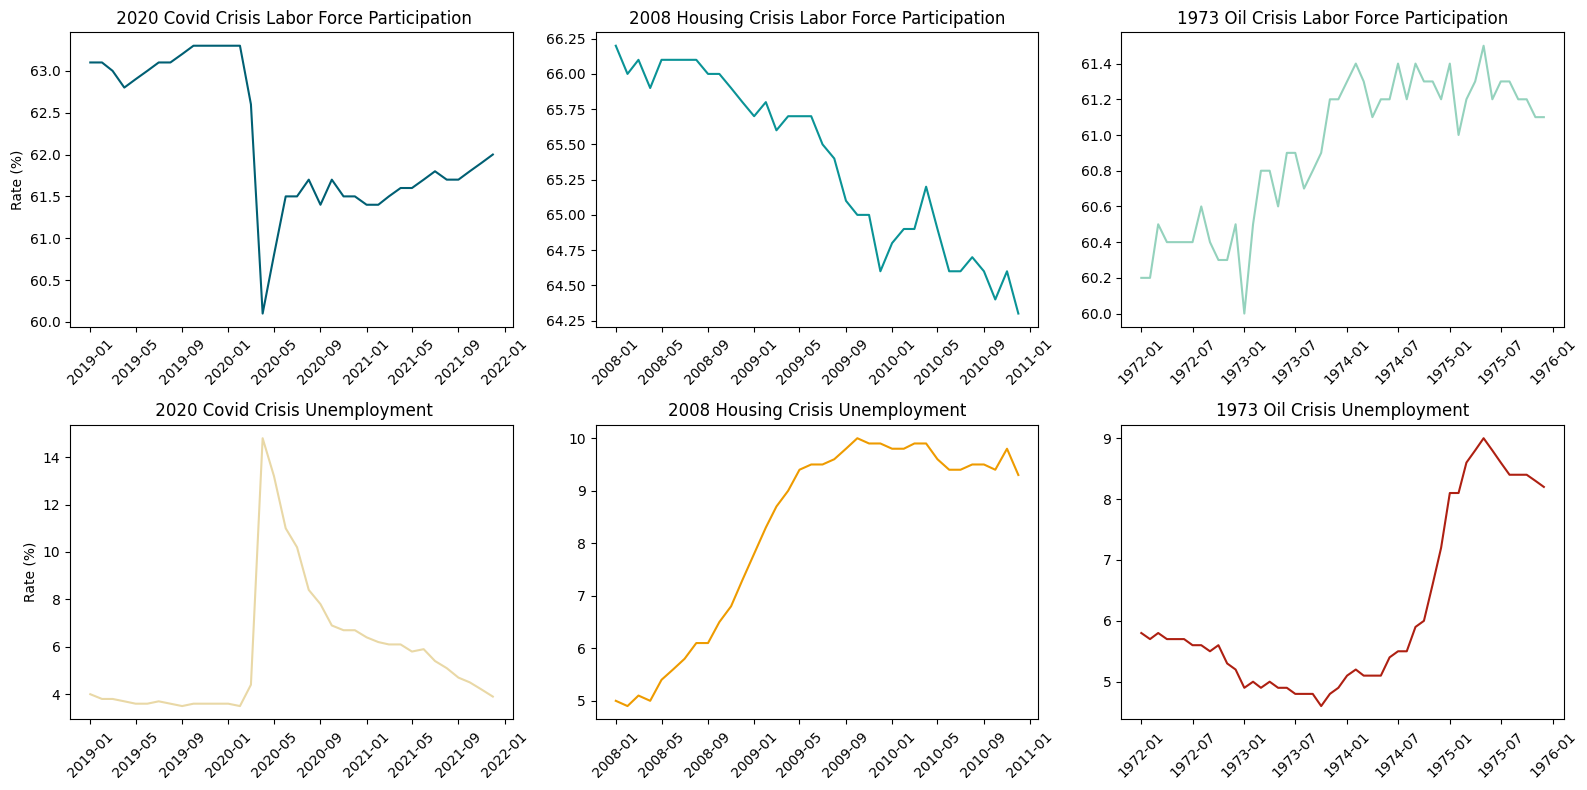

In [52]:
# Labor, unemployment comparison recessions

fig, ax = plt.subplots(2,3, figsize = (16,8))

# Covid Labor
ax[0,0].plot(lf_rate_2020, color = "#005F73")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_ylabel("Rate (%)")
ax[0,0].set_title(" 2020 Covid Crisis Labor Force Participation")

# 2008 Labor
ax[0,1].plot(lf_rate_2008, color = "#0A9396")
ax[0,1].set_title("2008 Housing Crisis Labor Force Participation")
ax[0,1].tick_params(axis='x', labelrotation=45)

# Oil Labor
ax[0,2].plot(lf_rate_1973, color = "#94D2BD")
ax[0,2].set_title("1973 Oil Crisis Labor Force Participation")
ax[0,2].tick_params(axis='x', labelrotation=45)

# Covid Unemployment
ax[1,0].plot(unrate_2020, color = "#E9D8A6")
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set_ylabel("Rate (%)")
ax[1,0].set_title(" 2020 Covid Crisis Unemployment")

# 2008 Unemployment
ax[1,1].plot(unrate_2008, color = "#EE9B00")
ax[1,1].set_title("2008 Housing Crisis Unemployment")
ax[1,1].tick_params(axis='x', labelrotation=45)

# Oil Unemployment
ax[1,2].plot(unrate_1973, color = "#AE2012")
ax[1,2].set_title("1973 Oil Crisis Unemployment")
ax[1,2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

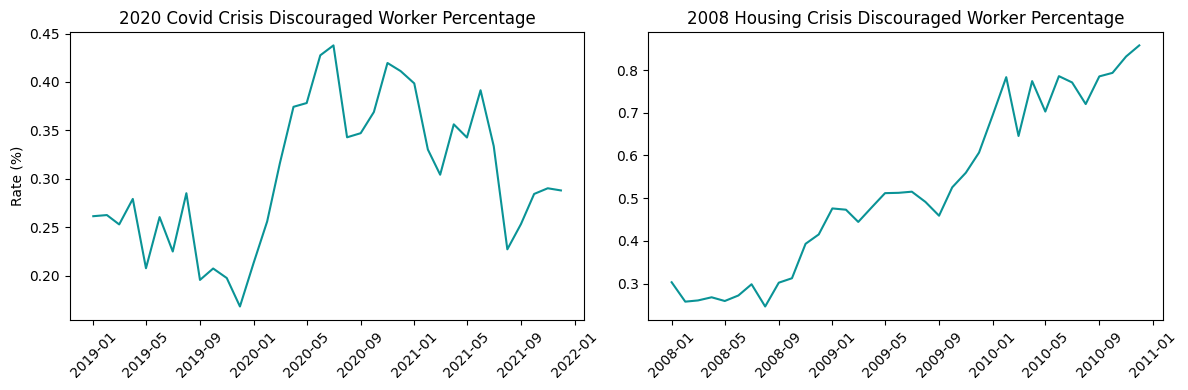

In [53]:
# Discouraged worker percentage 

fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Covid dw
ax[0].plot(dis_rate_2020, color = "#0A9396")
ax[0].set_ylabel("Rate (%)")
ax[0].set_title('2020 Covid Crisis Discouraged Worker Percentage')
ax[0].tick_params(axis='x', labelrotation=45)

# 2008 dw
ax[1].plot(dis_rate_2008, color = "#0A9396")
ax[1].set_title('2008 Housing Crisis Discouraged Worker Percentage')
ax[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

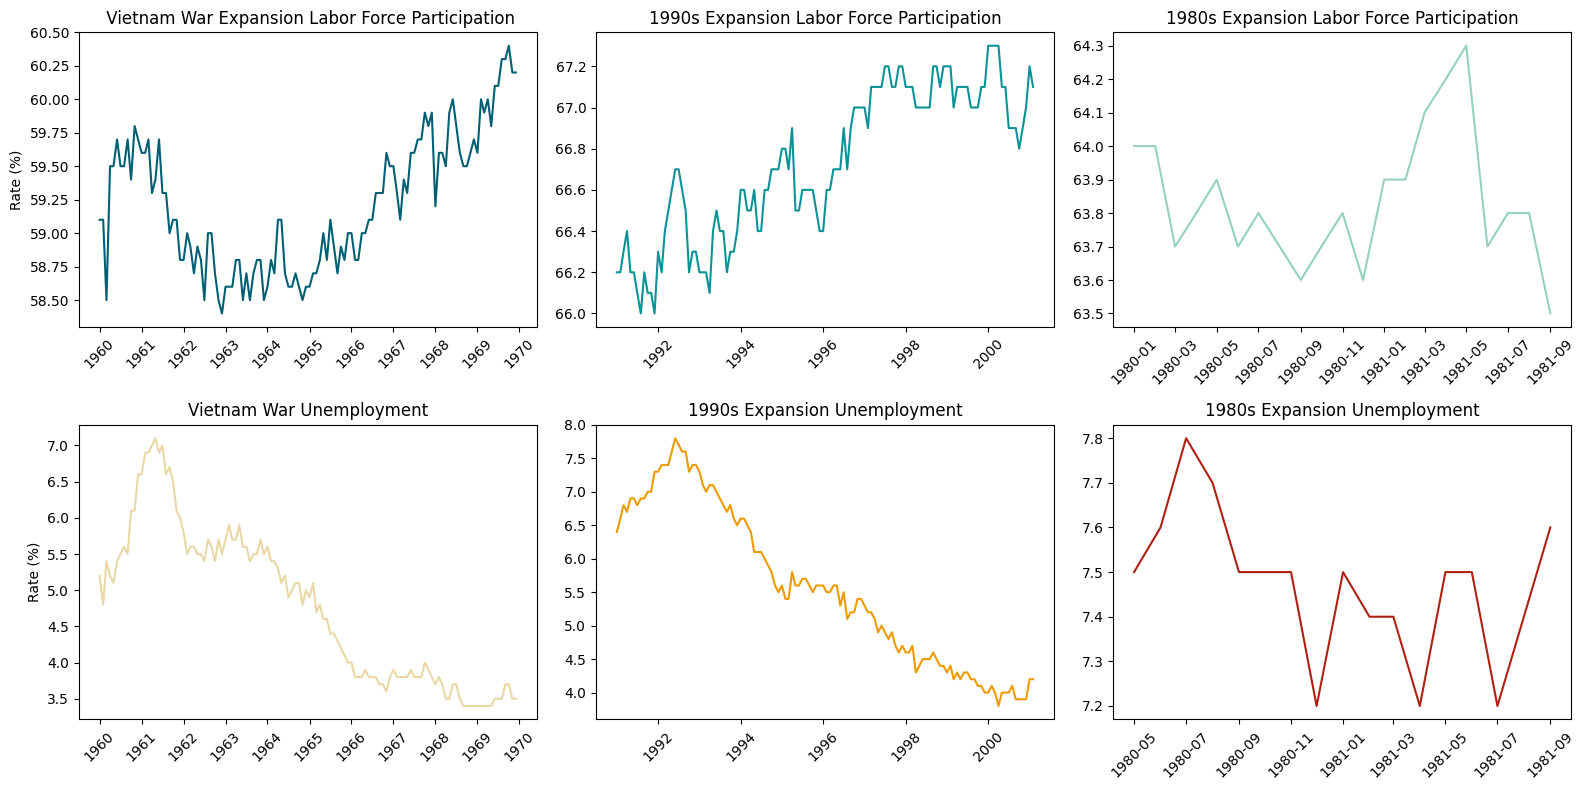

In [54]:
# Labor, unemployment comparison expansions

fig, ax = plt.subplots(2,3, figsize = (16,8))

# Vietnam Labor
ax[0,0].plot(lf_rate_1960, color = "#005F73")
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_ylabel("Rate (%)")
ax[0,0].set_title(" Vietnam War Expansion Labor Force Participation")

# 1990s Labor
ax[0,1].plot(lf_rate_1991, color = "#0A9396")
ax[0,1].set_title("1990s Expansion Labor Force Participation")
ax[0,1].tick_params(axis='x', labelrotation=45)

# 1980s Labor
ax[0,2].plot(lf_rate_1980, color = "#94D2BD")
ax[0,2].set_title("1980s Expansion Labor Force Participation")
ax[0,2].tick_params(axis='x', labelrotation=45)

# Vietnam Unemployment
ax[1,0].plot(unrate_1960, color = "#E9D8A6")
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set_ylabel("Rate (%)")
ax[1,0].set_title("Vietnam War Unemployment")

# 1990s Unemployment
ax[1,1].plot(unrate_1991, color = "#EE9B00")
ax[1,1].set_title("1990s Expansion Unemployment")
ax[1,1].tick_params(axis='x', labelrotation=45)

# 1980s Unemployment
ax[1,2].plot(unrate_1980, color = "#AE2012")
ax[1,2].set_title("1980s Expansion Unemployment")
ax[1,2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

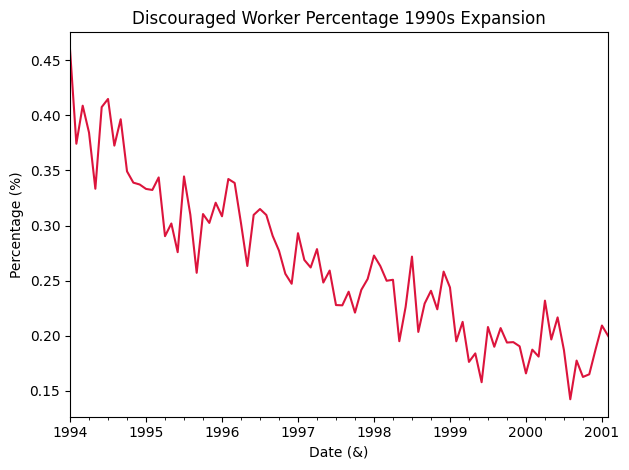

In [55]:
# discouraged worker percentage 1990s 
dis_rate_1991.plot(title = "Discouraged Worker Percentage 1990s Expansion", ylabel= "Percentage (%)", xlabel= "Date (&)", color = "crimson",
                   legend = False);
plt.tight_layout()

Research Question Four Conclusion:
-

In recessions, labor force participation decreases, unemployment increases, and discouraged worker percentage increases. One can easily see why this is the case since in recessions, more people lose their jobs and drop out the labor force in general due to the suffering economy. In expansions, labor force participation increases, unemployment decreases, and discouraged worker percentage increases. This is also easily seen since in expansions, the economy is growing, there are more job openings, and more people joining the workforce in general. 

Project Conclusion:
-

Through the use of comparison plots of the economic indicator variables that I was looking at, I was able to see how recessions and expansions influence GDP, CPI, bank rates, and employment indicators. The effect of a better or worse economy on these variables is more apparent in some more than others. For example, one can easily see how recessions and expansions affect labor force participation, unemployment rate, and discouraged worker percentage, but the affect on CPI is less clear. This could be because these variables are more responsive to economic growth and decline and therefore, would be a better indication of the health of the economy. To summarize my findings above, 

In recessions:
- GDP decreases
- CPI decreases
- The federal funds rate decreases. During Covid and the Housing Crisis, the rate was close to zero, but during the Oil Crisis, it only went down to about four percent.
- The discount rate decreases. This rate closely follows the federal funds rate but was less volatile during the Oil Crisis. 
- Labor force participation decreases
- The unemployment rate increases
- Discouraged worker percentage increases

In expansions:
- GDP increases
- CPI grows at a steady rate
- The federal funds rate increases substantially
- Discount rate increases, but the growth is more stable
- Labor force participation rate increases
- Unemployment rate decreases
- Discouraged worker percentage decreases

